# Betweeness Centrality Score Algorithm

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
import random
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline



In [3]:
df = pd.read_csv('C:/Users/Deepak Murugesan/Documents/jypyter notebook/Lakme.csv')
df_2 = pd.read_csv('C:/Users/Deepak Murugesan/Documents/jypyter notebook/Loreal Paris.csv')

In [4]:
df.head()

,ID,Dynamic Filter,Relationship,Relationship Date (UTC),Tweet,URLs in Tweet,Domains in Tweet,Hashtags in Tweet,Tweet Date (UTC),Twitter Page for Tweet,Latitude,Longitude,Imported ID,In-Reply-To Tweet ID
0,2,True,Mentions,31-08-2021 08:50,Hi @ILoveLakme ! Why have you discontinued you...,NaN,NaN,NaN,31-08-2021 08:50,https://twitter.com/#!/doc_roll20/status/14326...,NaN,NaN,1.430000e+18,NaN
1,6,True,Mentions,31-08-2021 15:30,@KareenaUpdates @ILoveLakme What are you start...,NaN,NaN,NaN,31-08-2021 15:30,https://twitter.com/#!/sadaqat26253486/status/...,NaN,NaN,1.430000e+18,1.430000e+18
2,6,True,Replies to,31-08-2021 15:30,@KareenaUpdates @ILoveLakme What are you start...,NaN,NaN,NaN,31-08-2021 15:30,https://twitter.com/#!/sadaqat26253486/status/...,NaN,NaN,1.430000e+18,1.430000e+18
3,7,True,Replies to,31-08-2021 17:26,@ILoveLakme \n\n I ordered 3 lipsticks under c...,https://twitter.com/i/web/status/1432756797102...,twitter.com,NaN,31-08-2021 17:26,https://twitter.com/#!/mkaur_k/status/14327567...,NaN,NaN,1.430000e+18,NaN
4,2,True,Mentions,01-09-2021 10:06,@KareenaK_FC @ILoveLakme Back to promoting Lak...,NaN,NaN,NaN,01-09-2021 10:06,https://twitter.com/#!/rameshjbhojwani/status/...,NaN,NaN,1.430000e+18,1.430000e+18


In [5]:
df.tail()

,ID,Dynamic Filter,Relationship,Relationship Date (UTC),Tweet,URLs in Tweet,Domains in Tweet,Hashtags in Tweet,Tweet Date (UTC),Twitter Page for Tweet,Latitude,Longitude,Imported ID,In-Reply-To Tweet ID
186,189,True,Tweet,03-09-2021 13:31,The season finale of the #LFWPodcast sees Kesh...,https://twitter.com/i/web/status/1433784753329...,twitter.com,lfwpodcast queer,03-09-2021 13:31,https://twitter.com/#!/lakmefashionwk/status/1...,NaN,NaN,1.430000e+18,NaN
187,190,True,Tweet,04-09-2021 14:09,From inclusivity to creating safe spaces for t...,https://twitter.com/i/web/status/1434156625044...,twitter.com,queer lfwpodcast,04-09-2021 14:09,https://twitter.com/#!/lakmefashionwk/status/1...,NaN,NaN,1.430000e+18,NaN
188,191,True,Tweet,06-09-2021 14:58,Whether it�s a summer resort or winter festive...,https://twitter.com/i/web/status/1434893773138...,twitter.com,NaN,06-09-2021 14:58,https://twitter.com/#!/lakmefashionwk/status/1...,NaN,NaN,1.430000e+18,NaN
189,192,True,Mentions,03-09-2021 16:33,RT @LakmeFashionWk: #Bodice X @reebokindia Sol...,NaN,NaN,bodice,03-09-2021 16:33,https://twitter.com/#!/mayankrazdinesh/status/...,NaN,NaN,1.430000e+18,NaN
190,193,True,Mentions,07-09-2021 17:07,RT @LakmeFashionWk: Catch some #LFWMoments tha...,NaN,NaN,lfwmoments,07-09-2021 17:07,https://twitter.com/#!/mayankrazdinesh/status/...,NaN,NaN,1.440000e+18,NaN


In [6]:
df.shape

(191, 14)

In [7]:
df.describe()

,ID,Latitude,Longitude,Imported ID,In-Reply-To Tweet ID
count,191.000000,0.0,0.0,1.910000e+02,5.900000e+01
mean,103.481675,NaN,NaN,1.430785e+18,1.430000e+18
std,65.243015,NaN,NaN,2.697171e+15,0.000000e+00
min,2.000000,NaN,NaN,1.430000e+18,1.430000e+18
25%,55.500000,NaN,NaN,1.430000e+18,1.430000e+18
50%,99.000000,NaN,NaN,1.430000e+18,1.430000e+18
75%,146.500000,NaN,NaN,1.430000e+18,1.430000e+18
max,636.000000,NaN,NaN,1.440000e+18,1.430000e+18


In [8]:
def clean_columns(col):
    return col.lower().replace(' ', '_').replace('/', '_')

In [9]:
df.columns = [clean_columns(col) for col in df.columns]
df.head(1)

,id,dynamic_filter,relationship,relationship_date_(utc),tweet,urls_in_tweet,domains_in_tweet,hashtags_in_tweet,tweet_date_(utc),twitter_page_for_tweet,latitude,longitude,imported_id,in-reply-to_tweet_id
0,2,True,Mentions,31-08-2021 08:50,Hi @ILoveLakme ! Why have you discontinued you...,NaN,NaN,NaN,31-08-2021 08:50,https://twitter.com/#!/doc_roll20/status/14326...,NaN,NaN,1.430000e+18,NaN


In [10]:
df_2.columns = [clean_columns(col) for col in df_2.columns]
df_2.head(1)

,tweet_id,tweet_url,tweet_posted_time,tweet_content,tweet_type,client,retweets_received,likes_received,tweet_location,tweet_language,user_id,name,username,user_bio,verified_or_non-verified,profile_url,user_followers,user_following,user_account_creation_date
0,"""1434821150090031105""",https://twitter.com/lorealindia/status/1434821...,06-Sep-2021 10:09:54,"""RT @ETBrandEquity: #Appointment | L’oréal Ind...",ReTweet,"""Twitter Web App""",1,0,India,French,"""269681267""",L'Oréal India,lorealindia,"""The official account for L'Oréal India. Our p...",Verified,https://twitter.com/lorealindia,1503,149,21-Mar-2011 07:58:19


In [11]:
df[df.columns[df.isnull().any()]].isnull().sum()

urls_in_tweet           140
domains_in_tweet        140
hashtags_in_tweet        88
latitude                191
longitude               191
in-reply-to_tweet_id    132
dtype: int64

In [12]:
df_2[df_2.columns[df_2.isnull().any()]].isnull().sum()

tweet_location    9
dtype: int64

In [13]:
df.columns[df.isnull().any()]

Index(['urls_in_tweet', 'domains_in_tweet', 'hashtags_in_tweet', 'latitude',
       'longitude', 'in-reply-to_tweet_id'],
      dtype='object')

In [14]:
def fill_na_with_mean_or_mode(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.mean()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)

In [15]:
df['domains_in_tweet'] [df.columns[20:40]]

Series([], Name: domains_in_tweet, dtype: object)

In [16]:
df['hashtags_in_tweet'][df.columns[20:40]]

Series([], Name: hashtags_in_tweet, dtype: object)

<AxesSubplot:xlabel='hashtags_in_tweet', ylabel='count'>

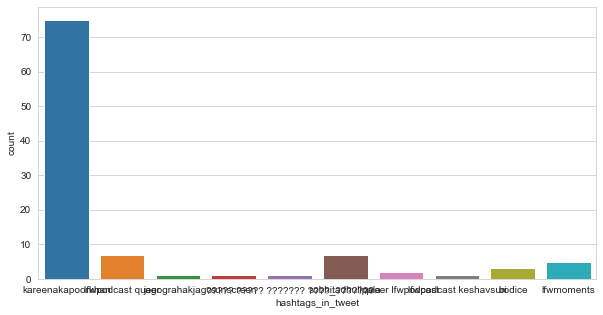

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df['hashtags_in_tweet'])

In [18]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df['hashtags_in_tweet']=scaler.fit_transform(df['hashtags_in_tweet'])

In [19]:
df['hashtags_in_tweet'].value_counts()

10    88
3     75
6      7
8      7
4      5
1      3
7      2
0      1
2      1
5      1
9      1
Name: hashtags_in_tweet, dtype: int64

In [20]:
df.columns

Index(['id', 'dynamic_filter', 'relationship', 'relationship_date_(utc)',
       'tweet', 'urls_in_tweet', 'domains_in_tweet', 'hashtags_in_tweet',
       'tweet_date_(utc)', 'twitter_page_for_tweet', 'latitude', 'longitude',
       'imported_id', 'in-reply-to_tweet_id'],
      dtype='object')

In [21]:
df['id'][:5]

0    2
1    6
2    6
3    7
4    2
Name: id, dtype: int64

In [22]:
df.shape

(191, 14)

In [23]:
message=df.copy()

In [24]:
message.head(5)

,id,dynamic_filter,relationship,relationship_date_(utc),tweet,urls_in_tweet,domains_in_tweet,hashtags_in_tweet,tweet_date_(utc),twitter_page_for_tweet,latitude,longitude,imported_id,in-reply-to_tweet_id
0,2,True,Mentions,31-08-2021 08:50,Hi @ILoveLakme ! Why have you discontinued you...,NaN,NaN,10,31-08-2021 08:50,https://twitter.com/#!/doc_roll20/status/14326...,NaN,NaN,1.430000e+18,NaN
1,6,True,Mentions,31-08-2021 15:30,@KareenaUpdates @ILoveLakme What are you start...,NaN,NaN,10,31-08-2021 15:30,https://twitter.com/#!/sadaqat26253486/status/...,NaN,NaN,1.430000e+18,1.430000e+18
2,6,True,Replies to,31-08-2021 15:30,@KareenaUpdates @ILoveLakme What are you start...,NaN,NaN,10,31-08-2021 15:30,https://twitter.com/#!/sadaqat26253486/status/...,NaN,NaN,1.430000e+18,1.430000e+18
3,7,True,Replies to,31-08-2021 17:26,@ILoveLakme \n\n I ordered 3 lipsticks under c...,https://twitter.com/i/web/status/1432756797102...,twitter.com,10,31-08-2021 17:26,https://twitter.com/#!/mkaur_k/status/14327567...,NaN,NaN,1.430000e+18,NaN
4,2,True,Mentions,01-09-2021 10:06,@KareenaK_FC @ILoveLakme Back to promoting Lak...,NaN,NaN,10,01-09-2021 10:06,https://twitter.com/#!/rameshjbhojwani/status/...,NaN,NaN,1.430000e+18,1.430000e+18


In [25]:
message.isnull().sum()

id                           0
dynamic_filter               0
relationship                 0
relationship_date_(utc)      0
tweet                        0
urls_in_tweet              140
domains_in_tweet           140
hashtags_in_tweet            0
tweet_date_(utc)             0
twitter_page_for_tweet       0
latitude                   191
longitude                  191
imported_id                  0
in-reply-to_tweet_id       132
dtype: int64

In [26]:
y=df['hashtags_in_tweet']
y[:5]

0    10
1    10
2    10
3    10
4    10
Name: hashtags_in_tweet, dtype: int32

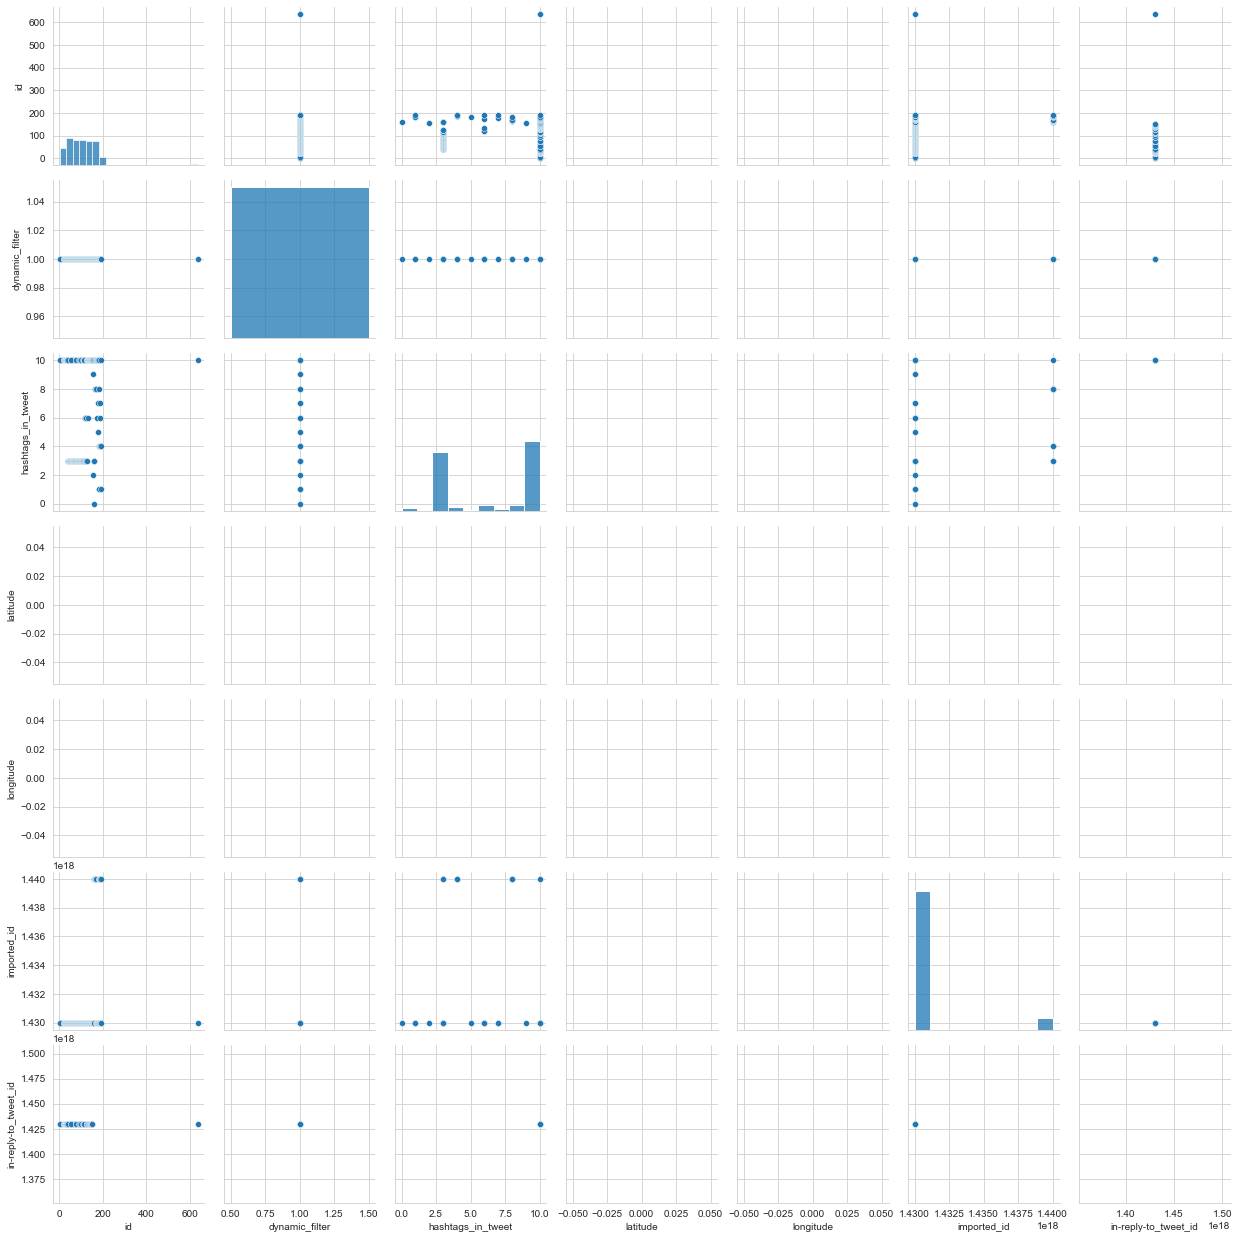

In [27]:
sns.pairplot(df)

In [29]:
y_true = [1, 900, 2, 1, 1]
y_pred = [1, 1, 5, 1, 1]

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


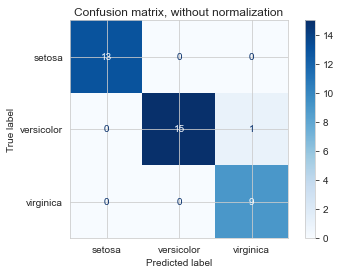

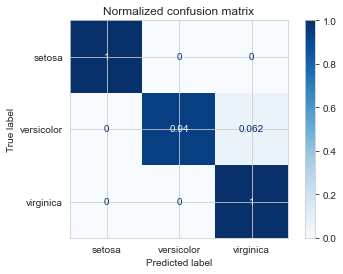

In [33]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.04).fit(X_train, y_train)

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1003
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=46)
model = LogisticRegression()
model.fit(xtrain, ytrain)
print(accuracy_score(ytest, model.predict(xtest)))

0.9108910891089109


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Kmode
nb_samples = 1003
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=46)
model = Kmode()
model.fit(xtrain, ytrain)
print(accuracy_score(ytest, model.predict(xtest)))

0.8316831683168316
